
# Generate a Probe from scratch

This example generates a probe from scratch.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GeoProbe import Probe
from GeoProbe.plotting import plot_probe

First, let's create dummy positions for a 24-contact probe



In [2]:
n = 24
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 8
    y = i % 8
    positions[i] = x, y
positions *= 20
positions[8:16, 1] -= 10

Now we can create a `Probe` object
 and set the position and shape of each contact
 
The `ndim` argument indicates that the contact is 2d, so the positions have a (n_elec, 2) shape.
 We can also define a 3d probe with `ndim=3` and positions will have a (n_elec, 3) shape.
 
Note: `shapes` and `shape_params` could be arrays as well, indicating the shape for each contact separately.



In [3]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='circle', shape_params={'radius': 5})

`Probe` objects have fancy prints!



In [4]:
print(probe)

Probe - 24ch - 1shanks


In addition to contacts, we can create the planar contour (polygon) of the probe



In [5]:
polygon = [(-20, -30), (20, -110), (60, -30), (60, 190), (-20, 190)]
probe.set_planar_contour(polygon)

If `pandas` is installed, the `Probe` object can be exported as a dataframe for a simpler view:



In [6]:
df = probe.to_dataframe()
df

,x,y,contact_shapes,radius,shank_ids,contact_ids
0,0.0,0.0,circle,5.0,,
1,0.0,20.0,circle,5.0,,
2,0.0,40.0,circle,5.0,,
3,0.0,60.0,circle,5.0,,
4,0.0,80.0,circle,5.0,,
5,0.0,100.0,circle,5.0,,
6,0.0,120.0,circle,5.0,,
7,0.0,140.0,circle,5.0,,
8,20.0,-10.0,circle,5.0,,
9,20.0,10.0,circle,5.0,,


If `matplotlib` is installed, the `Probe` can also be easily plotted:



(<matplotlib.collections.PolyCollection at 0x19df12b7500>,
 <matplotlib.collections.PolyCollection at 0x19df107a270>)

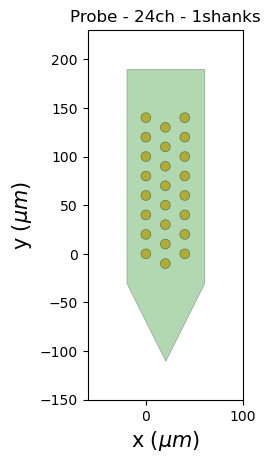

In [7]:
plot_probe(probe)

A 2d `Probe` can be transformed into a 3d `Probe` by indicating the `axes`
on which contacts will lie (Here the 'y' coordinate will be 0 for all contacts):



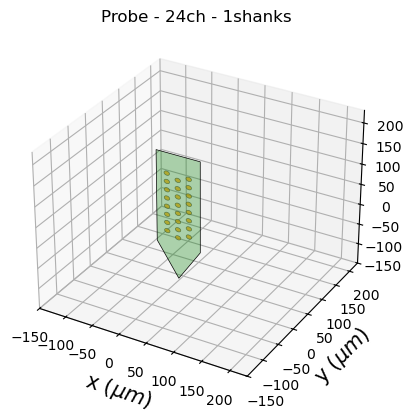

In [8]:
probe_3d = probe.to_3d(axes='xz')
plot_probe(probe_3d)

plt.show()